# Gatto

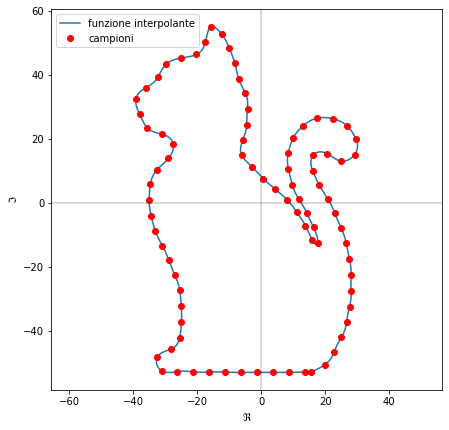

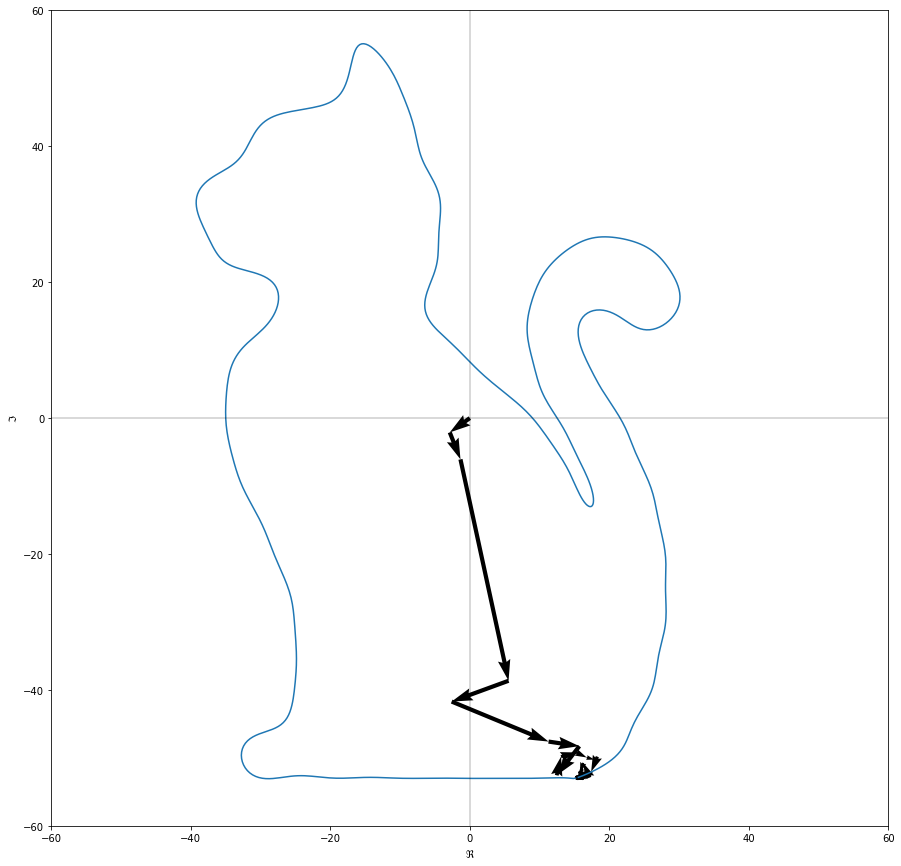

In [3]:
import numpy as np
import matplotlib.pyplot as plt
campioni = np.array([60.5603407827475-112.86437327364844j,64.9288992636861-110.59891096577503j,67.8457694973493-106.55357563905187j,70.08941625759827-102.09913388970605j,71.68195432357949-97.36813408225485j,72.63907543645092-92.44913410308993j,73.12385113424682-87.48362914743804j,73.10460992069478-82.4788887851444j,72.60228096126492-77.51766390014336j,71.59238701276416-72.61944955655756j,70.00449711799587-67.88598530725861j,68.05450303856782-63.27714938398803j,65.83342537759486-58.80405439871037j,63.22433679121847-54.535987161577495j,61.10355003352437-50.03347765684687j,61.20791665897455-45.138165622378835j,65.57958626234735-44.595909503225336j,69.87911461674537-46.960241677620665j,74.22939728582764-44.903612550720226j,74.68434681164626-40.11560326397451j,71.91029296214546-36.017153500573286j,67.50112535269167-33.74191963301087j,62.547037941788695-33.50796572810556j,58.17195337500002-35.86730368750001j,55.05043734425928-39.739987845397245j,53.46353281359102-44.44120761389161j,53.507416716651065-49.43241765355374j,54.70746802954103-54.28349036383057j,56.779144683988655-58.806697170911455j,59.25880045462514-63.16122924071635j,61.38586264151636-67.68263024730106j,62.7043783414134-72.47812166910269j,60.97978049598749-71.67677170005052j,58.853328981288925-67.1609540097561j,56.16782797959264-62.9283748484919j,53.077051355327626-59.00081614587498j,49.33326720663453-55.72211976984407j,45.726904403156986-52.47275104240297j,42.24906716498102-48.901787161872996j,38.94242615359801-45.16223998869201j,39.2267626252431-40.44442911656538j,40.46116843355694-35.62334534601934j,40.72840733670618-30.624826753489025j,40.05734394753243-25.68435203775651j,37.922490755371115-21.21767044731523j,36.781406418086526-16.393584223172414j,35.08062568844705-11.695688252436224j,32.692587248568834-7.300247730085912j,29.23373454101564-5.026774559375011j,27.564757019629273-9.733872444178633j,24.758265886221903-13.62302011777402j,19.905053855182334-14.775884988209818j,15.28119913344236-16.621368907747218j,12.669644700428313-20.802483717180266j,9.038225647466449-23.960244062673343j,5.8451158105286645-27.475459937065494j,6.990755156634538-32.33276437078858j,9.41211792789194-36.606984825905805j,13.990085961853044-38.57672013006592j,17.52234793628903-41.610777315225256j,15.998551536346454-46.15151843725587j,12.433559286739369-49.66384793554688j,10.375634247118946-54.15445140162429j,9.988545734815212-59.115570309798684j,10.578317362295996-64.0853470309155j,11.923472371060518-68.88427096459081j,14.078548694904345-73.40474629133608j,16.14547374797463-77.95960099898045j,18.004902444586055-82.59181662549497j,19.55361063079946-87.34874321360613j,20.018715946946493-92.31969164106427j,20.086634997746394-97.31743244255054j,19.487846805444075-102.26523478440585j,16.70430416363527-105.7946022175217j,12.575315550955374-108.2398846015698j,13.852837437156278-112.5018474233872j,18.828557765342843-112.77245243029687j,23.826004970403297-112.8577565517311j,28.830008404296894-112.91793808593752j,33.82640775136721-112.96277466060441j,38.828186083511-112.99542934107434j,43.831620861447334-113.01624740535513j,48.833795173882436-113.023361506317j,53.82700862730246-113.01063760901226j,58.81868720562317-112.9517133206463j])

campioni += -45 + 60j

# numero campioni
N = len(campioni)

# pulsazione fondamentale
w = 2/N*np.pi

# calcolo dei coefficienti ck
# shift di k
shift = -N//2
C = []
for k in range(0+shift, N+shift):
  ck = 0
  for h in range(N):
    ck += campioni[h] * np.exp(-1j*h*k*w)
  C.append(ck)

# costruzione della funzione che interpola gli N punti
def f(t):
  risultato = 0
  for k in range(0+shift, N+shift):
    risultato += C[k-shift] * np.exp(1j*k*w*t )
  return 1/N * risultato

# punti per rappresentare la funzione
t = np.linspace(0,N,1000)
plt.figure(figsize=(7,7))
plt.axis('equal')
plt.plot(f(t).real, f(t).imag, label = 'funzione interpolante')
plt.plot(np.real(campioni),np.imag(campioni), 'or', label = 'campioni')
plt.legend(loc='upper left')
plt.xlabel('$\Re$')
plt.ylabel('$\Im$')
plt.axhline(0, color='black', lw = 0.3)
plt.axvline(0, color='black', lw = 0.3)
plt.show()

class Fasore:
  def __init__(self, ck, w):
    self.ck = ck/N # valori normalizzati
    self.w = w

  def al_tempo(self,t):
    return self.ck * np.exp(1j * self.w * t)

w = 2*np.pi/N # pulsazione fondamentale
fasori = []

for k in range(0+shift, N+shift):  # creo i fasori
  fasori.append(Fasore(C[k-shift], k*w))

# riordino fasori con |w| crescente
fasori = sorted(fasori, key=lambda x: abs(x.w))

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Funzione per inizializzare il grafico
def init():
    ax.set_xlim(-60, 60)
    ax.set_ylim(-60,60)
    return []


# Funzione di aggiornamento per ogni frame dell'animazione
def update(frame):
    ax.clear()
    ax.set_xlim(-60, 60)
    ax.set_ylim(-60,60)

    t_istantanea = frame/10
    t = np.arange(0, t_istantanea, 0.1)

    old_risultante = 0 + 0j
    risultante = 0 + 0j
    for fasore in fasori:
        risultante += fasore.al_tempo(t_istantanea)
        ax.quiver([old_risultante.real], [old_risultante.imag],
                   [risultante.real - old_risultante.real],
                   [risultante.imag - old_risultante.imag],
                   angles='xy', scale_units='xy', scale=1, width=0.005)
        old_risultante = risultante

    ax.plot(f(t).real, f(t).imag)
    #ax.plot(np.real(campioni), np.imag(campioni), '.r')
    ax.set_xlabel('$\Re$')
    ax.set_ylabel('$\Im$')
    ax.axhline(0, color='black', lw=0.3)
    ax.axvline(0, color='black', lw=0.3)

    return []

# Configurazione iniziale
fig, ax = plt.subplots(figsize=(15, 15))

# Crea l'animazione
animation = FuncAnimation(fig, update, frames=N*10, interval = 20, init_func=init, blit=True)

# Visualizza l'animazione nel notebook
HTML(animation.to_html5_video())